In [1]:
import numpy as np
print('Numpy version',np.__version__)
import scipy as sc
print('Scipy version',sc.__version__)
import pandas as pd
print('Pandas version',pd.__version__)
import matplotlib as plt
print('MathPlot version',plt.__version__)


Numpy version 1.20.1
Scipy version 1.6.0
Pandas version 1.2.2
MathPlot version 3.3.4


# Pandas

In [2]:
a = [False ,False, True, True, False, True, False, True, True, True]
b = [False, False, True, False, False, True, False]
frame = pd.read_csv('Data_week_1.tsv', header=0, sep='\t')
def collapse(x):
    def arr(i):
        return (a[i]+b[i]) % 2
    return list(map(arr, range(x)))
#frame['Car Owner'] = list(a[i] + b[i] for i in range(3))
frame['Car Owner'] = collapse(len(frame))
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       6 non-null      object
 1   Birth      6 non-null      object
 2   City       6 non-null      object
 3   Position   4 non-null      object
 4   Car Owner  6 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [3]:
def nan_remover(data, coloumn, new_str):
    def job(data_body_2):
        if str(data_body_2) == 'nan':
            return new_str
        else:
            return data_body_2

    listed = []
    for i in range(len(data)):
        data_body = data[coloumn][i]
        listed.append(job(data_body))
    return listed

frame['Position'] = nan_remover(frame,'Position','безработынй')
frame.Birth = frame.Birth.apply(pd.to_datetime)

In [4]:
frame[(frame.City != 'Москва') |  (frame.Birth >= pd.datetime(1985,1,1))]


<ipython-input-4-805f93044d84>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  frame[(frame.City != 'Москва') |  (frame.Birth >= pd.datetime(1985,1,1))]


,Name,Birth,City,Position,Car Owner
1,Сорокин И.В.,1965-07-08,Волгоград,инженер,0
2,Белов М.М.,1980-02-13,Ростов,менеджер,0
3,Мельникова Д.С.,1985-04-15,Ростов,безработынй,1
4,Рыбина Е.П.,1985-11-19,Москва,инженер,0
5,Костров С.О.,1985-05-31,Москва,стажер,0


# Библиотеки Scipy и Numpy

In [5]:
x = list(map(lambda i: i**2, range(5)))
y = np.array(x)
print(type(x))
print(type(y))
y[[0,1,3]]

<class 'list'>
<class 'numpy.ndarray'>


array([0, 1, 9])

In [6]:
x = [list(map(lambda i: i**2, range(5))),list(map(lambda i: i+2, range(5)))]
y = np.array(x)
y[1,0]

2

In [7]:
z=[]
z.append(np.arange(0,1,0.1))
z.append(np.arange(0,2,0.5))
np.array(z)

<ipython-input-7-8124e0b95d5b>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(z)


array([array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
       array([0. , 0.5, 1. , 1.5])], dtype=object)

# SciPy

In [8]:
def sqr(xl,yl , const):
    return (xl[0]-yl[0])**2 + (xl[1]-yl[1])**2 + const
sqr([4.2,5.1],[4.2,5.1],3)

3.0

In [9]:
from scipy import optimize

In [10]:
def sqr_simp(x):
    return (x[0] - 1.2) ** 2 +(x[1] - 2.4) **2 + 3
minimum_x = optimize.minimize(sqr_simp,[1,1])
print(minimum_x.x)


[1.2        2.39999998]


## Решение систем уравнений

In [11]:
from scipy import linalg
a = [[1,1,0],[0,1,0],[0,0,1]]
b = [9,6,7]
x = linalg.solve(a,b)
print(x)
print(np.dot(a,x))

[3. 6. 7.]
[9. 6. 7.]


## MathPlotLib

In [12]:
%matplotlib inline

[-20 -15 -10  -5   0]
[59.09312593 21.20023311  8.73701109  6.94543913  0.76889315]


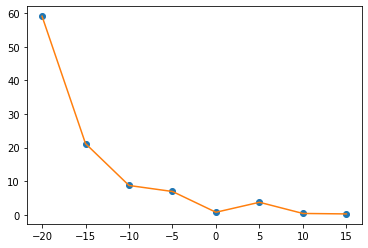

In [14]:
import pylab as graph
from scipy import interpolate
x = np.arange(-20,20,5)
y = np.exp(-x/5) + np.random.randn(len(x)) * 2
print(x[:5])
print(y[:5])
func = interpolate.interp1d(x,y,kind='linear')
xin = x
yin = func(x)
graph.plot(x,y,'o',xin,yin,'-')
graph.show()
%timeit

# Решение оптимизационных задач

In [ ]:
# Функция выбирается для тестов потому что интересный минимум
def roz(x):
    return 0.5*(1-x[0]) ** 2 + (x[1] - x[0]**2) ** 2
print(roz([1.,1.]))

In [ ]:
#Быстро на простых функциях
print(optimize.brute(roz,((-5,5),(-5,5))))
#Медленно но правильно
print(optimize.differential_evolution(roz,((-5,5),(-5,5))))

In [ ]:
#Так проверяем что с градиентом все нормально
def grad_roz(x):
    grad_x1 = (2*(x[1] - x[0] **2))
    grad_x0 = (-1*(1-x[0]) - 4 * x[0]*(x[1] - x[0]**2))
    return np.array([grad_x0,grad_x1])

#Градиент функции в каких-либо точках
def grad_func(x):
    return optimize.approx_fprime(x, roz, epsilon=0.01)
   # print(optimize.approx_fprime(x, roz, epsilon=0.01))
#print(optimize.check_grad(roz,grad_roz,[2, 2]))
#grad_func([2,2])
print(grad_roz([2,2]))
print(optimize.check_grad(roz,grad_roz,[2,2]))

In [ ]:
print(optimize.fmin_bfgs(roz,[2,2]))

In [ ]:
#Общая форма для нахождения минимума
print(optimize.minimize(roz,[2,2],method='BFGS',jac=grad_roz))

In [ ]:
#0 1
a = np.eye(4,5)
print(a[[0,3],[1,3]])
